In [1]:
from google.colab import files
files.upload() # upload kaggle.json


KeyboardInterrupt



In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ayeshaimran123/social-media-and-mental-health-balance           Social Media and Mental Health Balance                    5941  2025-10-26 07:51:53.380000           4414         65  1.0              
ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset    Global Earthquake-Tsunami Risk Assessment Dataset        16151  2025-10-01 16:35:53.273000          19655        666  1.0              
sadiajavedd/students-academic-performance-dataset               Students_Academic_Performance_Dataset                     8907  2025-10-23 04:16:35.563000           3465         86  1.0              


In [ ]:
!rm -rf /root/.cache/kagglehub/datasets/adityajha1504/chesscom-user-games-60000-games
import kagglehub, os
path = kagglehub.dataset_download("adityajha1504/chesscom-user-games-60000-games")
print("Path:", path)
print("Contents:", os.listdir(path))

Using Colab cache for faster access to the 'chesscom-user-games-60000-games' dataset.
Path: /kaggle/input/chesscom-user-games-60000-games
Contents: ['club_games_data.csv']


In [ ]:
import pandas as pd
df = pd.read_csv(f"{path}/club_games_data.csv")
df.head()

,white_username,black_username,white_id,black_id,white_rating,black_rating,white_result,black_result,time_class,time_control,rules,rated,fen,pgn
0,-Amos-,miniman2804,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/miniman2804,1708,1608,win,checkmated,daily,1/259200,chess,True,r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R ...,"[Event ""Enjoyable games 2 - Round 1""]\n[Site ""..."
1,-Amos-,koltcho69,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/koltcho69,1726,1577,win,resigned,daily,1/172800,chess,True,8/5Q1k/4n1pp/8/7P/2N2b2/PP3P2/5K2 b - - 1 33,"[Event ""Rapid Rats - Board 5""]\n[Site ""Chess.c..."
2,-Amos-,enhmandah,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/enhmandah,1727,842,win,resigned,daily,1/172800,chess,True,rn1q1b1r/kb2p1pp/2p5/p1Q5/N1BP2n1/4PN2/1P3PPP/...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."
3,enhmandah,-Amos-,https://api.chess.com/pub/player/enhmandah,https://api.chess.com/pub/player/-amos-,819,1727,checkmated,win,daily,1/172800,chess,True,r3kb1r/pp3ppp/3p1n2/2pKp3/P3P3/1P6/4qP1P/QNB5 ...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."
4,-Amos-,Shalllow-Blue,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/shalllow-blue,1729,1116,win,resigned,daily,1/172800,chess,True,r3b2r/pp6/2pPpR1k/4n3/2P3Q1/3B4/PP4PP/R5K1 b -...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."


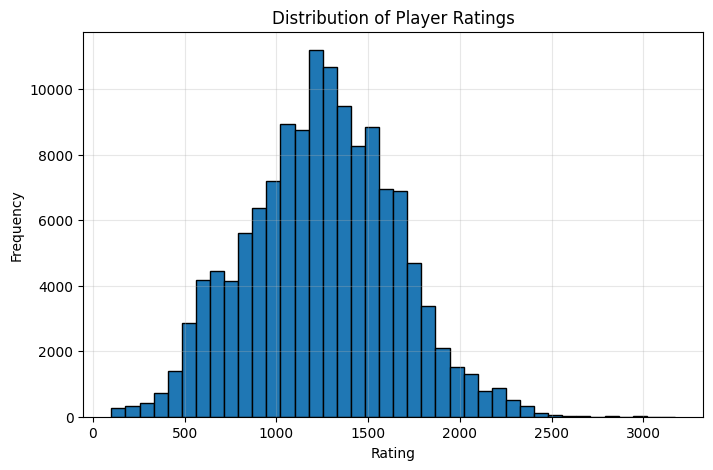

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Combine white and black ratings into one Series
all_ratings = pd.concat([df["white_rating"], df["black_rating"]], ignore_index=True)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(all_ratings, bins=40, edgecolor='black')
plt.title("Distribution of Player Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

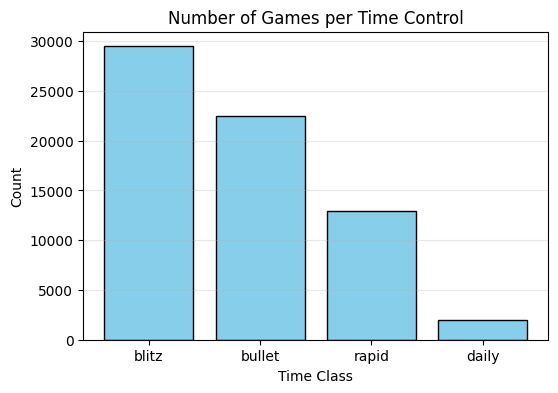

In [ ]:
time_classes = df["time_class"].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(time_classes.index, time_classes.values, color='skyblue', edgecolor='black')
plt.title("Number of Games per Time Control")
plt.xlabel("Time Class")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.3)
plt.show()

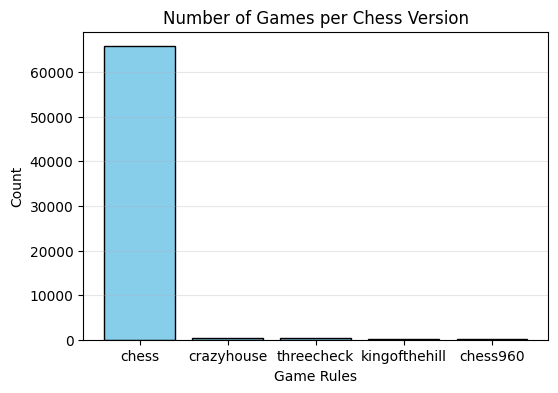

In [ ]:
rules = df["rules"].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(rules.index, rules.values, color='skyblue', edgecolor='black')
plt.title("Number of Games per Chess Version")
plt.xlabel("Game Rules")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.3)
plt.show()

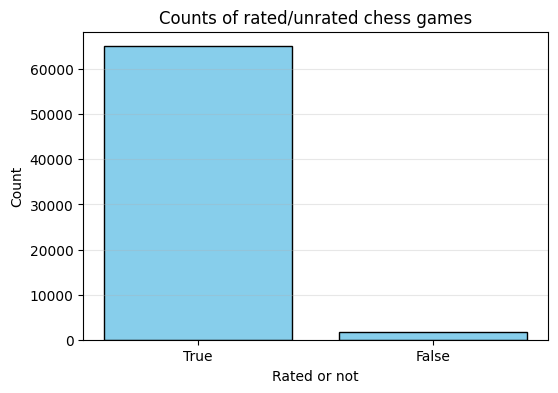

In [ ]:
rated_or_not = df["rated"].value_counts()
rated_or_not.index = rated_or_not.index.map(str)
plt.figure(figsize=(6, 4))
plt.bar(rated_or_not.index, rated_or_not.values, color='skyblue', edgecolor='black')
plt.title("Counts of rated/unrated chess games")
plt.xlabel("Rated or not")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.3)
plt.show()

In [ ]:
unique_outcomes = pd.unique(df[["white_result", "black_result"]].values.ravel())
print(unique_outcomes)
outcome_counts = pd.concat([df["white_result"], df["black_result"]]).value_counts()
print(outcome_counts)

['win' 'checkmated' 'resigned' 'timeout' 'abandoned' 'timevsinsufficient'
 'repetition' 'insufficient' 'stalemate' 'agreed' 'threecheck'
 'kingofthehill' '50move']
win                   64568
resigned              23288
timeout               20345
checkmated            17648
abandoned              2868
repetition             1424
timevsinsufficient      938
stalemate               928
insufficient            672
agreed                  648
threecheck              262
kingofthehill           157
50move                   12
Name: count, dtype: int64


In [ ]:
df.pgn[0].split('\n')

['[Event "Enjoyable games 2 - Round 1"]',
 '[Site "Chess.com"]',
 '[Date "2013.01.30"]',
 '[Round "-"]',
 '[White "-Amos-"]',
 '[Black "miniman2804"]',
 '[Result "1-0"]',
 '[Tournament "https://www.chess.com/tournament/enjoyable-games-2"]',
 '[CurrentPosition "r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R b K f3 1 22"]',
 '[Timezone "UTC"]',
 '[ECO "E22"]',
 '[ECOUrl "https://www.chess.com/openings/Nimzo-Indian-Defense-Spielmann-Variation"]',
 '[UTCDate "2013.01.30"]',
 '[UTCTime "16:35:14"]',
 '[WhiteElo "1708"]',
 '[BlackElo "1608"]',
 '[TimeControl "1/259200"]',
 '[Termination "-Amos- won by checkmate"]',
 '[StartTime "16:35:14"]',
 '[EndDate "2013.02.01"]',
 '[EndTime "18:14:48"]',
 '[Link "https://www.chess.com/game/daily/64629816"]',
 '',
 '1. d4 Nf6 2. c4 e6 3. Nc3 Bb4 4. Qb3 Bxc3+ 5. Qxc3 O-O 6. Bg5 c5 7. dxc5 Nc6 8. Nf3 Qa5 9. Bxf6 gxf6 10. Qxa5 Nxa5 11. e3 Rd8 12. Rd1 Kg7 13. Be2 b6 14. Rd4 bxc5 15. Rg4+ Kh6 16. Bd3 f5 17. Rh4+ Kg6 18. g4 Ba6 19. gxf5+ exf5 20. Ne5+ Kf6 21. R

In [ ]:
pip install duckdb

In [ ]:
def extract_move(pgn):
    if(pgn.find('{[') == -1):
        original_list = pgn.split("\n")[-2].split()
        toberemoved_list = pgn.split("\n")[-2].split()[::3]
        new_list = [x for x in original_list if x not in toberemoved_list]
        return new_list
    else:
        return pgn.split("\n")[-2].split()[1::4]
df['Moves'] = df['pgn'].apply(extract_move)
print(df['Moves'])

0        [d4, Nf6, c4, e6, Nc3, Bb4, Qb3, Bxc3+, Qxc3, ...
1        [e4, e5, Nf3, Nc6, Bc4, Bc5, c3, a6, d4, exd4,...
2        [d4, d5, e3, c6, c4, dxc4, Bxc4, b5, Bb3, a5, ...
3        [e4, c5, b3, Nc6, a4, d6, Bb5, Bd7, Qf3, Nd4, ...
4        [d4, e6, c4, Qf6, Nf3, d6, Bg5, Qg6, Nc3, c6, ...
                               ...                        
66874    [e4, e6, d4, d5, e5, f5, Nf3, Nc6, c3, Bd7, Qb...
66875    [e4, e5, c4, Nc6, d3, Nf6, g3, d6, Nh3, Bg4, B...
66876    [e4, e5, Nf3, d6, Bc4, c5, Ng5, Qxg5, O-O, Bh3...
66877    [e4, c5, d3, Nc6, c4, e5, Nc3, Nf6, g3, d6, Nh...
66878    [e4, e5, f4, d6, fxe5, dxe5, Nf3, Bd6, d4, c5,...
Name: Moves, Length: 66879, dtype: object


In [ ]:
null_count = df['Moves'].isnull().sum()
print(null_count)

0


In [ ]:
null_or_empty = df['Moves'].isnull().sum() + df['Moves'].apply(lambda x: len(x) == 0 if isinstance(x, list) else False).sum()
print(null_or_empty)


493


In [20]:
feature_names = ['Event', 'Site', 'Start_Date', 'End_Date', 'Start_Time',
                 'End_Time', 'Eco', 'EcoName', 'Round', 'Result']
feature_positions = [0, 1, 2, -6, -7, -5, -15, -14, 3, 6]


for feature_name, position in zip(feature_names, feature_positions):
    df[feature_name] = df['pgn'].apply(
        lambda x: x.split('\n')[position].split('"')[1])

In [21]:
df['EcoName'] = df['EcoName'].apply(lambda x: x.split('/')[-1])

In [22]:
import duckdb

con = duckdb.connect(database=':memory:', read_only=False)

con.register('df_table', df)

distinct_econames = con.execute("SELECT EcoName, COUNT(*) as count FROM df_table GROUP BY EcoName ORDER BY count DESC").fetchdf()


print("Count of EcoNames:")
display(distinct_econames)

Count of EcoNames:


,EcoName,count
0,Bishops-Opening,1206
1,Scandinavian-Defense,1018
2,Queens-Pawn-Opening-Accelerated-London-System,966
3,Vant-Kruijs-Opening,927
4,Sicilian-Defense-Bowdler-Attack,849
...,...,...
3128,Ruy-Lopez-Opening-Jaenisch-Exchange-Variation,1
3129,Ruy-Lopez-Opening-Birds-Defense-4.Nxd4-exd4-5....,1
3130,Sicilian-Defense-Kronberger-Variation-2...Nc6,1
3131,Caro-Kann-Defense-Two-Knights-Attack-3...dxe4,1


In [23]:
df.pgn.iloc[-1].split("\n")[-2]

'1. e4 {[%clk 0:05:00]} 1... e5 {[%clk 0:04:56.3]} 2. f4 {[%clk 0:04:58.6]} 2... d6 {[%clk 0:04:55.3]} 3. fxe5 {[%clk 0:04:55.3]} 3... dxe5 {[%clk 0:04:53.4]} 4. Nf3 {[%clk 0:04:54.7]} 4... Bd6 {[%clk 0:04:48.6]} 5. d4 {[%clk 0:04:48.4]} 5... c5 {[%clk 0:04:47.9]} 6. dxe5 {[%clk 0:04:45.6]} 6... Bc7 {[%clk 0:04:43.4]} 7. Bc4 {[%clk 0:04:42.7]} 7... Qxd1+ {[%clk 0:04:40.7]} 8. Kxd1 {[%clk 0:04:40.3]} 8... Ne7 {[%clk 0:04:35.4]} 9. Be3 {[%clk 0:04:38.6]} 9... O-O {[%clk 0:04:33.2]} 10. Bxc5 {[%clk 0:04:35.1]} 10... Rd8+ {[%clk 0:04:22.5]} 11. Nbd2 {[%clk 0:04:27.3]} 11... Nec6 {[%clk 0:04:14.7]} 12. Ke2 {[%clk 0:04:18.6]} 12... Bg4 {[%clk 0:04:09.4]} 13. h3 {[%clk 0:04:13.8]} 13... Bxf3+ {[%clk 0:04:07.2]} 14. gxf3 {[%clk 0:04:12.4]} 14... Nxe5 {[%clk 0:04:06.4]} 15. Bb3 {[%clk 0:04:04.4]} 15... b6 {[%clk 0:04:03.2]} 16. Be3 {[%clk 0:04:00.2]} 16... Nbc6 {[%clk 0:03:58]} 17. Nc4 {[%clk 0:03:47.5]} 17... Nxc4 {[%clk 0:03:55.2]} 18. Bxc4 {[%clk 0:03:46.2]} 18... Na5 {[%clk 0:03:51.4]} 19. 

In [24]:
df_blitz = df[df['time_class'] == 'blitz']
df_blitz.head()
print(f"Number of blitz games: {len(df_blitz)}")

Number of blitz games: 29470


In [25]:
print(con.execute("""
    SELECT COUNT(DISTINCT player_id) AS distinct_players
    FROM (
        SELECT white_id AS player_id FROM df_table WHERE time_class = 'blitz'
        UNION
        SELECT black_id AS player_id FROM df_table WHERE time_class = 'blitz'
    )
""").fetchdf())



   distinct_players
0             26342


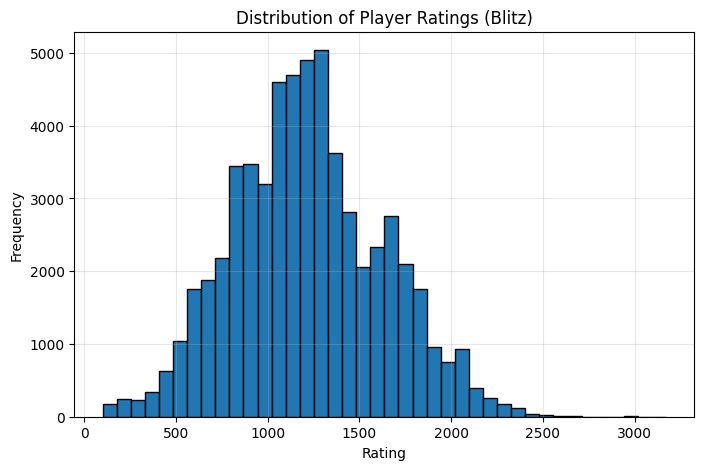

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
blitz_df = df[df["time_class"] == "blitz"]

# Combine white and black ratings for blitz games
all_ratings = pd.concat([blitz_df["white_rating"], blitz_df["black_rating"]], ignore_index=True)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(all_ratings, bins=40, edgecolor='black')
plt.title("Distribution of Player Ratings (Blitz)")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

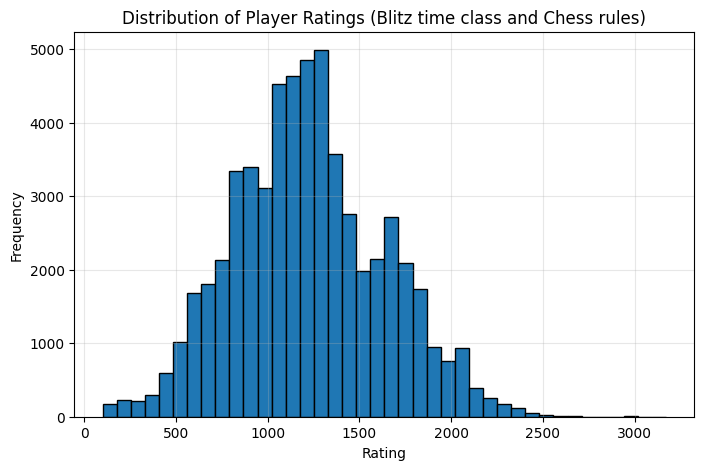

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
blitz_df = df[(df["time_class"] == "blitz") & (df["rules"] == "chess")]

# Combine white and black ratings for blitz games
all_ratings = pd.concat([blitz_df["white_rating"], blitz_df["black_rating"]], ignore_index=True)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(all_ratings, bins=40, edgecolor='black')
plt.title("Distribution of Player Ratings (Blitz time class and Chess rules)")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

In [28]:
import requests

url = "https://api.chess.com/pub/player/-amos-"
headers = {
    "User-Agent": "MyChessApp/1.0 (contact@example.com)"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    print(response.json())
else:
    print(f"Error: {response.status_code} - {response.text}")

{'player_id': 9142478, '@id': 'https://api.chess.com/pub/player/-amos-', 'url': 'https://www.chess.com/member/-Amos-', 'name': 'Nicholas Amos', 'username': '-amos-', 'followers': 0, 'country': 'https://api.chess.com/pub/country/US', 'location': 'Louisiana', 'last_online': 1360354745, 'joined': 1349387260, 'status': 'basic', 'is_streamer': False, 'verified': False, 'streaming_platforms': []}


We followed [this kaggle tutorial](https://www.kaggle.com/code/adityajha1504/those-features-won-t-engineer-themselves/notebook) by adityajha1504 on kaggle to break down the pgn values add extract more features from it.